# Interpolation 1

### The bottom line is... that in real life situations we use:
* ***from scipy.interpolate import interp1d*** 
* (has all what we need, linear, cuadratic, cubic=spline)
  
### To understand the theory of interpolation we will go through various approaches:

* Lagrange polynomials
* divided differences
* Hermite polynomials

### Why do we need theory if one can use a piece of code?
* phycist/scientist must know how the tool he uses works!

## Motivation
In Physics things are divided by:
 * "impossible to understand"
 * "trivial"

Thats the feeling we have. The transition from one feeling to another is almost always possible, sometimes we just need to find different explanation.

Quite often even terminology is intimidating. Hermite polynomials, Lagrange polynomials. Most of the time behind strange names there is a simple idea. We need a bit of patience to find a better source of information.

## What's the purpose of interpolation
- Estimating intermediate values between ***precise*** data point!!!
- if the data carries error the its better to use fit the data using regression!!!
- smoothing the points?
- if one wants to take the derivative of original points then the results is not smooth
- interpolating points can mean interpolate a solution - speeding a code
- if you stay in Physics you will need it!

## To practice we will use scipy and its modules:

### to visualize the theory of interpolation
* from scipy.interpolate import ***lagrange***
* from scipy.interpolate import ***CubicHermiteSpline***

### In real life those two are most common is:
* from scipy.interpolate import ***interp1d***

## We will look at the theory of interpolation:
- Polynomial interpolation 
  - Lagrange interpolation
  - Linar, Cuadratic interpolation
  - Hermite interpolation (divided differences) - useful 
- Spline interpolation - useful

<img src="imgs/polynomial_vs_spline.png" width="600" />

* Difference between interpolation and extrapolation

* Polynomial Interpolation: ONE unique $n^{th}$ order polynomial passes through n points.
  * Newton’s Divided Difference Interpolating Polynomials
  * Lagrange Interpolating Polynomials

* Spline Interpolation: Pass different curves (mostly 3rd order - cubic) through different subsets of the data points.


## Example when you don't use interpolation
Lets look at a data set

A body is moving under the influence of an external force, the variation of the position measured for different 
times are compiled in table 1. 

| t(s) | x(m) | v(m/s)         
| :------: |:-------------: | :-------:|
|0| 2.76 | 33.10
| 1.11| 29.66 | 21.33
| 2.22|46.83 | 16.57
|3.33 | 44.08 |-5.04
| 4.44| 37.26| -11.74
| 5.55| 12.03| -27.32| 

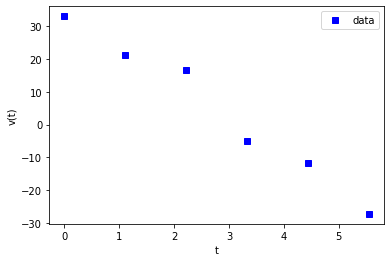

In [1]:
import numpy as np
import matplotlib.pyplot as plt
t=np.array([0,1.11, 2.22,3.33, 4.44, 5.55])
v=np.array([ 33.10, 21.33, 16.57,-5.04, -11.74, -27.32])
fig,ax=plt.subplots(1,1)
ax.plot(t,v,'sb', label='data')
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

<img src="imgs/dont_interpolate.png" width="500" />

* Given a data set, the first approach to find a function that passes through the points would be using a interpolation polynomial. 
* But we should take special attention to the way data set is gathered, i.e., usually is a sample obtained experimentally or in a way that has associated an intrinsic error. 
* Then, forcing that the approximate function passes through all the points would actually incur in incrementing the error. This is why it is necessary to build a different procedure to build the function that fits the data.

## Example when you can use interpolation

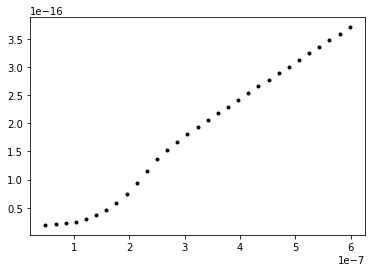

In [2]:
import pandas as pd

df=pd.read_csv('data_pressure_vs_temparature.csv')
df.head()

Pressure=df['Pressure']
Temperature=df['Temperature']
import matplotlib.pyplot as plt

fig, ax=plt.subplots(1,1)
ax.plot(Temperature,Pressure,'.k')

<img src="imgs/interpolate.png" width="400" />

#### Here I shoul start with linear interpolation but Lagrange is more interesting and linear will come later

# Polynomial Interpolation
## Lagrange Interpolation

## Interpolation using Lagrange polynomials
https://en.wikipedia.org/wiki/Lagrange_polynomial

### Definition:

$$P_n(x)=\sum_{i=0}^{n}L_i(x) f(x_i) \quad \text{where} \quad L_i(x)=\prod_{j=0,j \neq i}^{n} \frac{(x-x_j)}{(x_i-x_j)}$$

* where $L_i(x)$  is called Lagrange multiplier

* $\sum$- sum (addition) 

* $\prod$ - product (multiplication) 

example for n=1

so for the summation part i can be equal 0 o 1. 

* i=0, then in the Langrange multiplier part jcannot be 0 because of the condicion so j=1 and we put the indices.
* i=1, then in the Langrange multiplier part can be 0 and we put the indices, but j cannot be 1 because of the condition.

finally

$$P_1(x)=\frac{(x-x_1)}{(x_0-x_1)}f(x_0) + \frac{(x-x_0)}{(x_1-x_0)}f(x_1)$$

example for n=2

$$P_2(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_1)(x_2-x_2)}f(x_2)$$

### Details :
* not being used much in practice
* not easy to compute,
* but is good for $\color{red}{\text{methodology}}$
* see why:


#### How to "derive" Lagrange Polynomial! Lets imagine we have three points

$$x_0=1,	f(x_0)=7$$
$$x_1=2,	f(x_1)=5$$
$$x_2=3,	f(x_2)=2$$

we can plot them

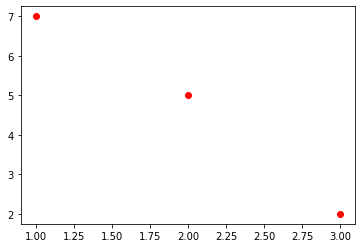

In [1]:
# first just the three points
import numpy as np
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
x=np.array([1,2,3])
y=np.array([7,5,2])
ax.plot(x,y,'ro')

***We want to construct a polynomial (function) that will pass through all the three points that we have. Because if the polynomial (function) passes through all the points that we know, it means that for all other points we can well approximate (estimate / interpolate) the value value of that polynomial (function) ***

Lets write the points again:

$$x_0=1,	f(x_0)=7$$
$$x_1=2,	f(x_1)=5$$
$$x_2=3,	f(x_2)=2$$


If we know our first condition that the polynomial must pass through the three points! we can just simply write so obvious ***trial function***:

$p(x)=7y_1 + 5y_2 + 2y_3$ 

with some coefficients that we can call $y_1,y_2,y_3$ (coefficients will help to fulfil the condition mentioned above). 
so the task is to find $y_1,y_2,y_3$

Lets first look how the $y_1,y_2,y_3$ must work.

If we try the first point $x_0=1$ then we expect that $p(x=x_0)=7$ (see the plot) To get this solution from our trial function $p(x)=7y_1 + 5y_2 + 2y_3$ we have to have $y_1=1$ and $y_2=y_3=0$ and that would give us what we want, which is $p(x=x_0)=7$

similarly for all three points we have three conditions for y:

$$ p(x=x_0=1)=7 \quad \text{if} \quad y_1=1, y_2=y_3=0$$
$$ p(x=x_1=2)=5 \quad \text{if} \quad y_2=1, y_1=y_3=0$$
$$ p(x=x_2=3)=2 \quad \text{if} \quad y_3=1, y_1=y_2=0$$

So we know what values $y_1,y_2,y_3$ must have for the three poinnts ($1$ or $0$) but we dont know how to get those values. So we need to find the expressions for $y_1,y_2,y_3$ such that the the upper conditions can be fulfiled.

From the conditions above we can see that $y_1=0$ for two cases: when $x=2$ or $x=3$, so the only solution to make solution $y_1=0$ would be something like this:

$$y_1=(x-2)(x-3)$$ 
$$y_2=(x-1)(x-3)$$ 


so if we substitute into above $x=2$ or $x=3$ then $y_1=0$, but there is one more condition that we want that if $x=1$ then $y_1=1$, but if we substitute $x=1$ then $y_1=2$, so to change 2 into 1 we have to normalize (divide by the nominator) for $x=x_0=1$ it to get $y_1=1$ for $x=1$:

$$y_1=\frac{(x-2)(x-3)}{(x_0-2)(x_0-3)}= 1 \quad \text{for} \quad (x=1,x_0=1), \quad \text{but} = 0  \quad \text{for} \quad (x=2=3) $$

it works because if $x=1$ then $y_1=1$, if $x=2$ then $y_1=0$, if $x=3$ then $y_1=0$. So, $y_1$ behaves as we wanted (has value $0$ or $1$). 

but we know that the values that we substituted $1,2,3$ correspond to variables $x_0,x_1,x_2$ (that we are given) such that $1=x_0, 2=x_1, 3=x2$ so we can generalize the above equation:

So for the three different points x, $y_1,y_2,y_3$ behave as we wanted (have value $0$ or $1$):

$$y_1=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}= 1 \quad \text{for} \quad (x=1), \quad \text{but} = 0  \quad \text{for} \quad (x=x_1=x_2) $$

$$y_2=\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}= 1 \quad \text{for} \quad (x=2), \quad \text{but} = 0  \quad \text{for} \quad (x=2=3) $$

$$y_3=\frac{(x-x_0)(x-x_1)}{(x_2-x_1)(x_2-x_2)}= 1 \quad \text{for} \quad (x=3), \quad \text{but} = 0  \quad \text{for} \quad (x=0=1) $$

Now one can see that the coefficients of the trial funcion are Lagrange multipliers that we derived. Lets confirm...

for example lets look at $y_1$: 

if x=1:
$$y_1=\frac{(1-2)(1-3)}{(1-2)(1-3)}= 1$$

if x=2:
$$y_1=\frac{(2-2)(2-3)}{(1-2)(1-3)}= 0$$


We can see that the equation for the multipliers fulfil the initial condition so we can substitute them into the trial function

$$p(x)=y_1 7 + y_2 5+ y_3 2$$

and what we obtain is Langrange Polynomial!!!! (compare with the initial equation with sum and multiplication):

$$P(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_1)(x_2-x_2)}f(x_2)$$

which is basically $P_2(x)$ (remember that the sum was from 0 to n, so if n=2 then we there are three elements of the sum). In other words:  (n=number of points -1)

So $(x)$ is the point we want to interpolate, and $x_0,x_1,x_2$ are the points $f(x_0),f(x_1),f(x_2)$ are the function at those point, that we also know.

***The main property of Lagrange multipliers is that are zero for all other points except $x_i$ (which is normalized).***

* Again, at the points that we know the polynomial must reduce itself to the value of that function for that point.
  * for x=1 the P(x=1)=7, 
  * for x=2 the P(x=1)=5, 
  * for x=3 the P(x=1)=2, 

  * we can check:
  
$$P(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_1)(x_2-x_2)}f(x_2)$$  

  * so if the polynomial (function) passes through all the points that we know, it means that for all other points we can estimate (interpolate) the value which is P(x)

### Lets for fun visualize the multipliers, to see only how they look:

#### multiplier y1 vs x (must be y1=1 for x=1 and zero for x=2, x=3)

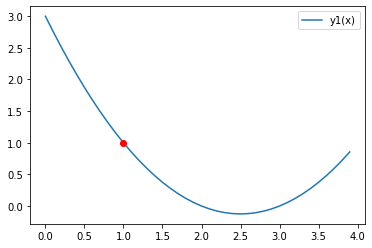

In [4]:
import numpy as np
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
x=np.arange(0, 4, 0.1)
y1=((x-2)*(x-3))/2
ax.plot(x,y1,label='y1(x)')
ax.plot(1,1,'ro')
ax.legend()

#### multiplier y2 vs x (must be y2=1 for x=2 and zero for x=1, x=3)

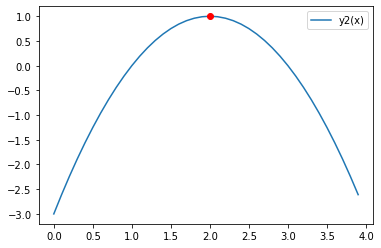

In [5]:
import numpy as np
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
x=np.arange(0, 4, 0.1)
y2=-(x-1)*(x-3)
ax.plot(x,y2,label='y2(x)')
ax.plot(2,1,'ro')
ax.legend()

#### multiplier y3 vs x (must be y3=1 for x=3 and zero for x=1, x=2)

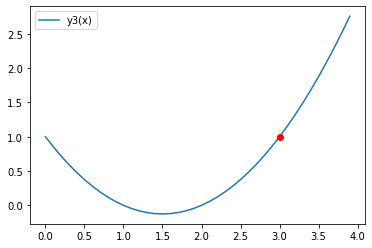

In [6]:
import numpy as np
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
x=np.arange(0, 4, 0.1)
y3=(x-1)*(x-2)/2
ax.plot(x,y3,label='y3(x)')
ax.plot(3,1,'ro')
ax.legend()

#### Lets plot the points again:

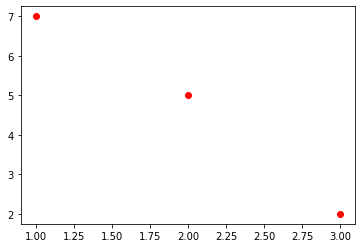

In [7]:
# first just the three points
import numpy as np
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
x=np.array([1,2,3])
y=np.array([7,5,2])
ax.plot(x,y,'ro')

* At the points that we have the polynomial must reduce itself to the value of that function for that point.
  * for x=1 the P(x=1)=7, 
  * for x=2 the P(x=1)=5, 
  * for x=3 the P(x=1)=2, 

  * we can check:
  
$$P(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_1)(x_2-x_2)}f(x_2)$$  

  * so if the polynomial (function) passes through all the points that we know, it means that for all other points we can estimate (interpolate) the value which is P(x)

### Lets plot the $P(x)$ for any $x$:

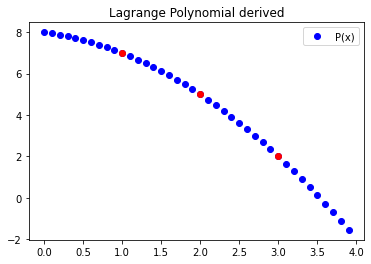

In [8]:
# and using all the multipliers and the f(x_i) as in the trial funcion definition gives:
import numpy as np
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
x=np.array([1,2,3])
y=np.array([7,5,2])



x = np.linspace(0,4,1000)
y=(x-x[1])*(x-x[2])/((x[0]-x[1])*(x[0]-x[2])))*y[0] 
ax.plot(xnew,ynew,'bo',label='P(x)')
x=np.array([1,2,3])
y=np.array([7,5,2])
ax.plot(x,y,'ro')
plt.title('Lagrange Polynomial derived')
ax.legend()

#### we have found a function, a polynomial (Lagrange) that passes through all the three points and allow us to interpolate point inbetween!

### Example code of Lagrange polynomial

$$P_n(x)=\sum_{i=0}^{n}L_i(x) f(x_i) \quad \text{where} \quad L_i(x)=\prod_{j=0,j \neq i}^{n} \frac{(x-x_j)}{(x_i-x_j)}$$

In [9]:
# Lagrange Interpolation
# Importing NumPy Library
import numpy as np

# given three points
x=np.array([1,2,3])
y=np.array([7,5,2])

# point to interpolate using Lagrange Polynomial
xp=1.5

# initializing interpolated value (=0)
yp = 0

# Implementing Lagrange Interpolation

for i in range(len(x)):                        # this is the sum part
    p = 1
    for j in range(len(x)):                    # multiplier part
        if i!= j:
            p = p * (xp - x[j])/(x[i] - x[j])  # multiplier part             
    yp = yp + p * y[i]                         # sum part  

# Displaying output
print(f'Interpolated value at {xp} is {yp}.')

Interpolated value at 1.5 is 6.125.


### we can now simply convert the code into a function and call it for any value making a plot as presented earlier.

### But the beauty of Python is that the Lagrange routine is already part of scipy:

Text(0.5, 1.0, 'Lagrange Polynomial SciPy')

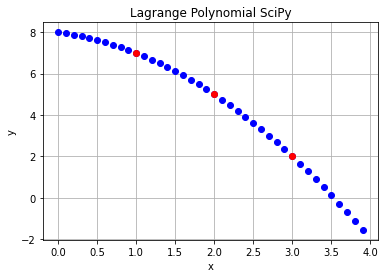

In [2]:
from scipy.interpolate import lagrange
# we use function lagrange to find the Lagrange multipliers
x=np.array([1,2,3])
y=np.array([7,5,2])

f_lagr = lagrange(x, y)

fig,ax = plt.subplots(1,1)
xnew = np.arange(0, 4, 0.1)

ax.plot(xnew, f_lagr(xnew), 'bo')
ax.plot(x, y, 'ro')
ax.grid('True')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Lagrange Polynomial SciPy')